In [1]:
import dask.array as da
import warnings

import dask.array as da
from sklearn.pipeline import Pipeline
from dask_ml.model_selection import train_test_split
from dask_ml.model_selection import GridSearchCV
from dask_ml.decomposition import PCA
from dask_ml.preprocessing import PolynomialFeatures
from dask_ml.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas
from toolz.curried import groupby, valmap, pipe, pluck, merge_with, merge
from toolz.curried import map as fmap

from pymks.fmks.data.elastic_fe import solve
from pymks.fmks.data.multiphase import generate

from pymks.fmks.plot import plot_microstructures
from pymks.fmks.bases.primitive import PrimitiveTransformer
from pymks.fmks.correlations import TwoPointCorrelation, FlattenTransformer
from dask.distributed import Client, progress
import time
from mpl_toolkits import mplot3d
%matplotlib notebook
%load_ext memory_profiler

In [2]:
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
da.random.seed(10)
np.random.seed(10)

tmp = [
    generate(shape=(100, 101, 101,101), grain_size=x, volume_fraction=(0.5, 0.2,0.3), chunks=25, percent_variance=0.15)
    for x in [(15, 2,2), (2,2, 15), (7,7, 7), (9, 9,3), (9,9, 9), (2, 2,2)]
]
x_data_gen = da.concatenate(tmp)

In [4]:
# client = Client( threads_per_worker=2,
#                 n_workers=2, memory_limit='8GB')
# client

In [5]:
bl1 = Pipeline(steps=[
    ("discritize",PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0)),
    ("Correlations",TwoPointCorrelation(periodic_boundary=True, cutoff=15,correlations=[(1,1)])),
    ('flatten', FlattenTransformer()),  
    ('reducer',PCA(n_components=3))])

In [6]:
tic = time.time()
%memit a=bl1.fit(x_data_gen)
toc = time.time()
print(tic-toc)

peak memory: 21856.88 MiB, increment: 21669.17 MiB
-55.917983293533325


In [7]:
tic = time.time()
%memit b=bl1.transform(x_data_gen).compute()
toc = time.time()
print(tic-toc)
print(b)

peak memory: 20412.53 MiB, increment: 19898.43 MiB
-55.58185648918152
[[-22.3318323   -0.35798073  -0.1546765 ]
 [-17.29534407  -0.35121262  -0.16908957]
 [ -0.53150301  -0.33310158  -0.1974314 ]
 ...
 [-17.38929242  -0.40588558   0.05913536]
 [-19.26320065  -0.40785729   0.06158576]
 [-19.23862359  -0.40824712   0.06113792]]


In [12]:
da.random.seed(10)
np.random.seed(10)
tmp2 = [
    generate(shape=(100, 101, 101,101), grain_size=x, volume_fraction=(0.5, 0.2,0.3), chunks=20, percent_variance=0.15)
    for x in [(15, 2,2), (2,2, 15), (7,7, 7), (9, 9,3), (9,9, 9), (2, 2,2)]
]
x_data_gen2 = da.concatenate(tmp2)

In [13]:
tic = time.time()
%memit a2=bl1.fit(x_data_gen2)
toc = time.time()
print(tic-toc)

peak memory: 233.24 MiB, increment: 8.72 MiB
-57.32075381278992


In [14]:
tic = time.time()
%memit b2=bl1.transform(x_data_gen2).compute()
toc = time.time()
print(tic-toc)
print(b2)

peak memory: 237.11 MiB, increment: 3.87 MiB
-55.54633283615112
[[ 16.85441973   0.33408693  -0.19618105]
 [ 25.67381245   0.33917288  -0.18851464]
 [-20.06429403   0.32959643  -0.17627906]
 ...
 [ 18.33761214   0.39153544   0.03187277]
 [ 18.76685197   0.39120024   0.03178419]
 [-22.6513789    0.38215066   0.04763132]]


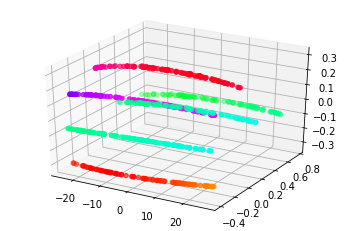

In [15]:
fig = plt.figure()
ax = plt.axes(projection="3d")

# z_line = np.linspace(0, 15, 1000)
# x_line = np.cos(z_line)
# y_line = np.sin(z_line)
# ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = b[:,2]
x_points = b[:,0]
y_points = b[:,1]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

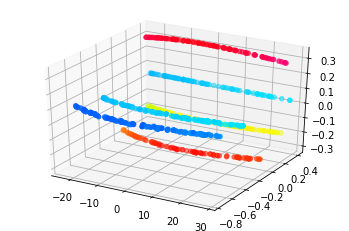

In [16]:

fig = plt.figure()
ax = plt.axes(projection="3d")

# z_line = np.linspace(0, 15, 1000)
# x_line = np.cos(z_line)
# y_line = np.sin(z_line)
# ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = b2[:,2]
x_points = b2[:,0]
y_points = b2[:,1]
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()
